In [1]:
!echo $LCIO

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt



In [2]:
gInterpreter->AddIncludePath("$LCIO");
gSystem->Load("${LCIO}/lib/liblcio.so");
gSystem->Load("${LCIO}/lib/liblcioDict.so");

Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for include/pre-generated/IO/ILCFactory.h
   requested to autoload type IO::ILCFactory
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for include/pre-generated/IO/LCEventListener.h
   requested to autoload type IO::LCEventListener
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for include/pre-generated/IO/LCReader.h
   requested to autoload type IO::LCReader
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for include/pre-generated/IO/LCRunListener.h
   requested to autoload type IO::LCRunListener
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for include/pre-generated/IO/LCWriter.h
   requested to autoload type IO::LCWriter
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for include/pre-generated/EVENT/CalorimeterHit.

In [3]:
!git clone https://github.com/ILDAnaSoft/miniDST.git

fatal: destination path 'miniDST' already exists and is not an empty directory.



In [4]:
!curl -o rv01-16-p10_250.sv01-14-01-p00.mILD_o1_v05.E250-TDR_ws.I106479.Pe2e2h.eL.pR-00001-ILDminiDST.slcio https://desycloud.desy.de/index.php/s/5LmrjGWqziQfMe7/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current


                                 Dload  Upload   Total   Spent    Left  Speed




  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  174M    0 1736k    0     0  1933k      0  0:01:32 --:--:--  0:01:32 1933k

  6  174M    6 11.0M    0     0  5970k      0  0:00:29  0:00:01  0:00:28 5967k

 11  174M   11 20.4M    0     0  7246k      0  0:00:24  0:00:02  0:00:22 7244k

 17  174M   17 29.8M    0     0  7847k      0  0:00:22  0:00:03  0:00:19 7847k

 22  174M   22 39.1M    0     0  8204k      0  0:00:21  0:00:04  0:00:17 8202k

 27  174M   27 48.5M    0     0  8442k      0  0:00:21  0:00:05  0:00:16 9611k

 33  174M   33 58.0M    0     0  8622k      0  0:00:20  0:00:06  0:00:14 9624k

 38  174M   38 67.3M    0     0  8738k      0  0:00:20  0:00:07  0:00:13 9601k

 44  174M   44 76.7M    0     0  8840k      0  0:00:20  0:00:08  0:00:12 9614k

 49  174M   49 86.1M    0     0  892

In [5]:
!cat miniDST/examples/higgs_recoil.C

#ifndef __CINT__ 
#include "lcio.h"
#include "IO/LCReader.h"
#include "IOIMPL/LCFactory.h"
#include "EVENT/LCCollection.h"
#include "EVENT/ReconstructedParticle.h"
#include "EVENT/LCEvent.h"
#include "UTIL/LCTOOLS.h"
#include "UTIL/LCIterator.h"
#endif

#include "TH1F.h"
#include "TLorentzVector.h"

/*
put this into your .rootlogon.C file

{
 gInterpreter->AddIncludePath("$LCIO");
 gSystem->Load("${LCIO}/lib/liblcio.so");
 gSystem->Load("${LCIO}/lib/liblcioDict.so");
}

for the LCIO API documentation see:
http://lcio.desy.de/v02-09/doc/doxygen_api/html/index.html
*/


using namespace lcio ;



template<class T>
double inv_mass(T* p1, T* p2){
  double e = p1->getEnergy()+p2->getEnergy() ;
  double px = p1->getMomentum()[0]+p2->getMomentum()[0];
  double py = p1->getMomentum()[1]+p2->getMomentum()[1];
  double pz = p1->getMomentum()[2]+p2->getMomentum()[2];
  return( sqrt( e*e - px*px - py*py - pz*pz  ) );
}

template<class T>
TLorentzVector v4(T* p){
  return TLorentzVector( p->getMomen

In [6]:
.L miniDST/examples/higgs_recoil.C

In [7]:
higgs_recoil( "rv01-16-p10_250.sv01-14-01-p00.mILD_o1_v05.E250-TDR_ws.I106479.Pe2e2h.eL.pR-00001-ILDminiDST.slcio" )


  10001 events read from file: rv01-16-p10_250.sv01-14-01-p00.mILD_o1_v05.E250-TDR_ws.I106479.Pe2e2h.eL.pR-00001-ILDminiDST.slcio
 out of which 1096 events don't have two muons 


Info in <TCanvas::Print>: pdf file recoil_plot.pdf has been created


In [8]:
auto canvas = (TCanvas*)gROOT->GetListOfCanvases()->At(0)

(TCanvas *) @0x7faa156d1a20


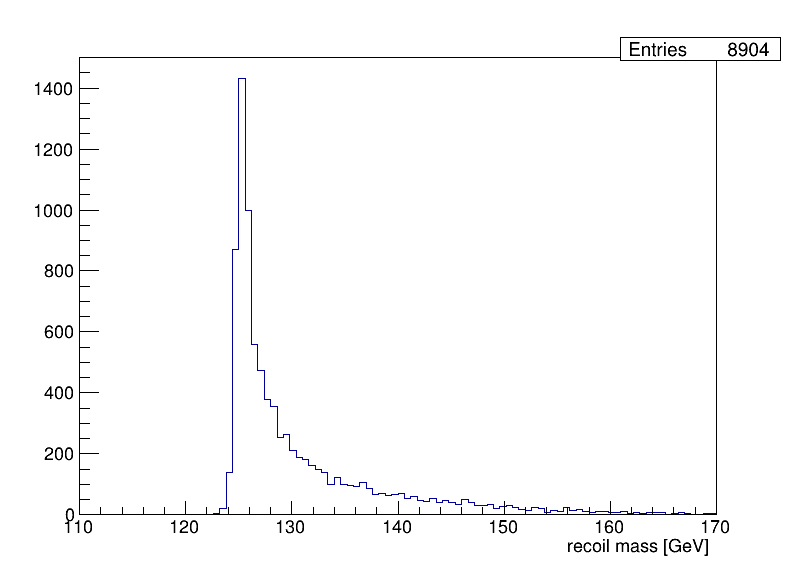

In [9]:
canvas->Draw()